# Identify the Noise-Type Corresponding to the Image

In [215]:
%run ./CodeCopied/libraries.ipynb
%run ./CodeCopied/constants.ipynb
%run ./CodeCopied/def_file_system.ipynb
%precision 3
np.set_printoptions(precision=2)
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
PIL       : 10.4.0
sklearn   : 1.5.2
pandas    : 2.2.3
re        : 2.2.1
matplotlib: 3.9.3
cv2       : 4.10.0
seaborn   : 0.13.2
scipy     : 1.14.1
skimage   : 0.24.0
plotly    : 5.24.1
numpy     : 1.26.4
json      : 2.0.9

kernel constants loaded
cv2 shape dictionary loaded
Stored 'plt_color' (str)
Stored 'label_color' (str)
Stored 'title_color' (str)
matplotlib colors loaded
 	plot color: darkblue 	label color: firebrick 	title_color: orangered


Saved image to uniform1.jpg.png


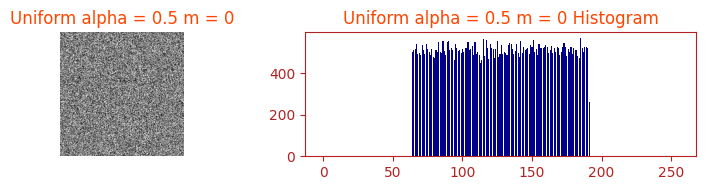

In [243]:
# gaussian1 = addNoise_gaussian(mode='grayscale')
# plt.imshow(gaussian1)
# plt.show()
uniform1 = addNoise_uniform(alpha = .5, scale=1, m=0)
save_image(uniform1, f'uniform1.jpg')
display_pair(uniform1, title='Uniform alpha = 0.5 m = 0', save=True)

Saved image to rayleigh1_alpha5_scale1_m0.jpg.png


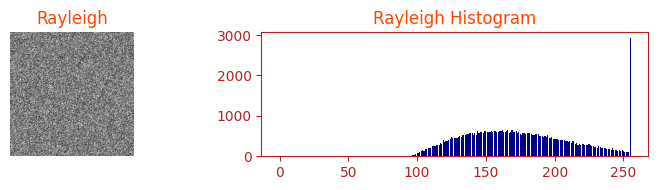

In [255]:
rayleigh1 = addNoise_rayleigh(alpha = .25, scale=1, m=0)
save_image(rayleigh1, f'rayleigh1_alpha5_scale1_m0.jpg')
display_pair(rayleigh1, title='Rayleigh', save=True)

Saved image to poisson_alpha5_lam50.jpg.png


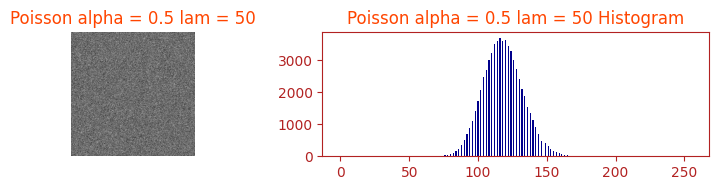

In [261]:
poisson1 = addNoise_poisson(alpha=0.5, lam=50)
save_image(poisson1, f'poisson_alpha5_lam50.jpg')
display_pair(poisson1, title='Poisson alpha = 0.5 lam = 50', save=True)

## Step 1: Load & Examine Noisy Images + Histogram




SINGLE CHANNEL VARIABLE NAMES OF LOADED IMAGES: 

 -  gaussian_archimedes_PIL_gray [+] gaussian_archimedes_np_gray
 -  gaussian_dragon_PIL_gray [+] gaussian_dragon_np_gray
 -  gaussian_einstein_PIL_gray [+] gaussian_einstein_np_gray
 -  gaussian_fermat_PIL_gray [+] gaussian_fermat_np_gray
 -  gaussian_nebula_PIL_gray [+] gaussian_nebula_np_gray
 -  gaussian_prof-aull_PIL_gray [+] gaussian_prof-aull_np_gray
 -  gaussian_pythagoras_PIL_gray [+] gaussian_pythagoras_np_gray
 -  white_gaussian_PIL_gray [+] white_gaussian_np_gray


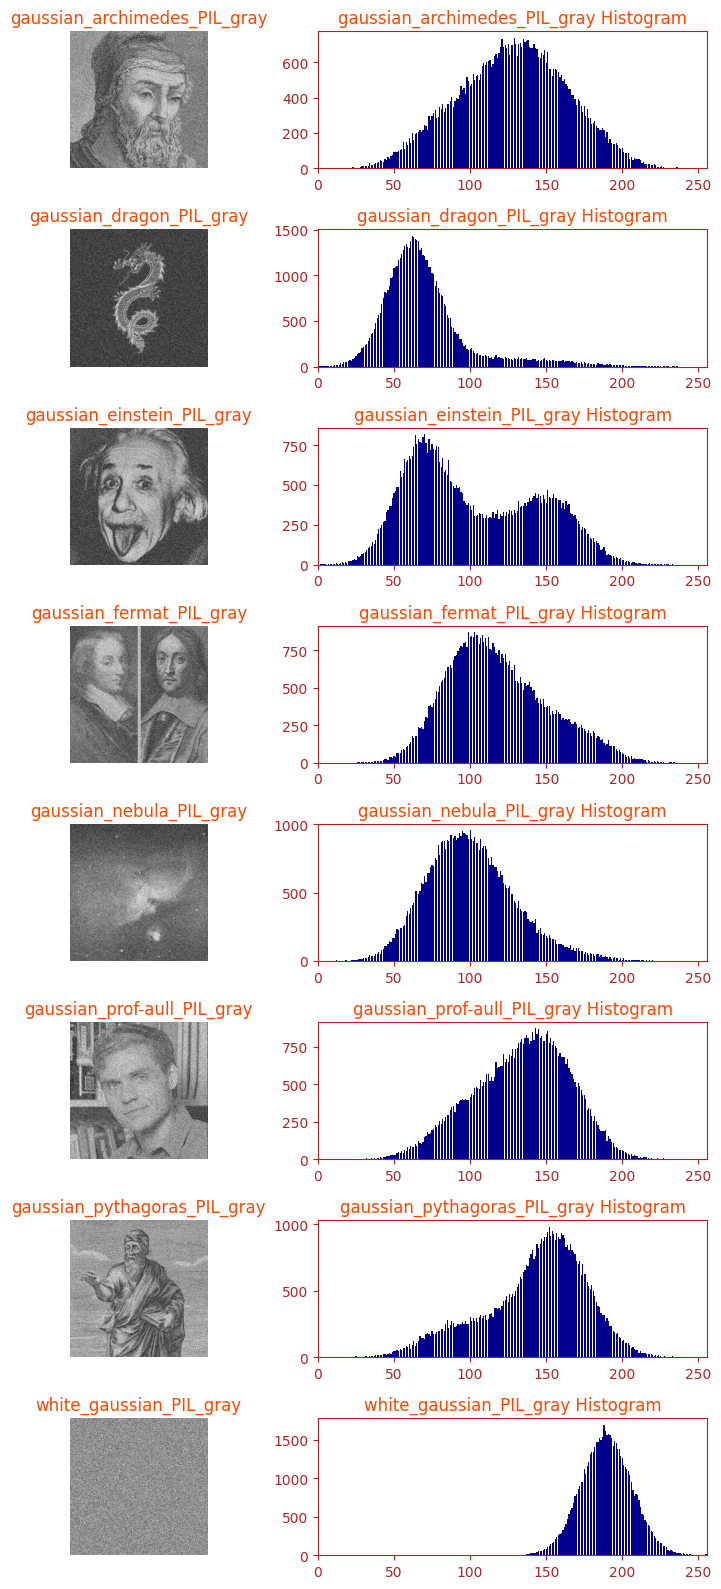

In [271]:
DATA_DIR = r'C:\Users\Jumbo\Documents\Courses\EE 104 - Aull\Final Project\images'
NOISY_GAUSS = DATA_DIR + r'\sample_images_noisy_gaussian'
NOISY_UNIFORM = DATA_DIR + r'\sample_images_noisy_uniform'
#NOISY_POISSON = DATA_DIR + r'\sample_images_noisy_poisson'

#obtain gauss images from file
gauss_PIL_gray_data, gauss_PIL_gray_titles, gauss_labels = import_from_folder(NOISY_GAUSS, classification=None, color_mode='gray', title_addon=None, display_names=True, force_binary=False)
#display histograms 
plot_nxhist(gauss_PIL_gray_data, titles=gauss_PIL_gray_titles, auto_title=True, fileName=None, save=False)

## Step 2: Obtain Sub-Sample

Original Image Dimensions: (255, 255)


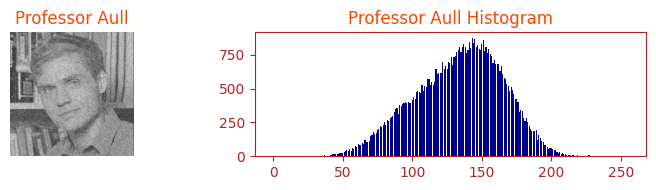

In [291]:
#select demo image for single runthrough
demo_image = gauss_PIL_gray_data[5]
#Display the original image and its dimensions
print(f"Original Image Dimensions: {demo_image.size}")  #(width, height)
display_pair(demo_image, title='Professor Aull', save=True)

Original Image Dimensions: (255, 255)
Enter crop boundaries:


Leftmost Pixel:  210
Uppermost Pixel:  210
Rightmost Pixel:  245
Lowermost Pixel:  245


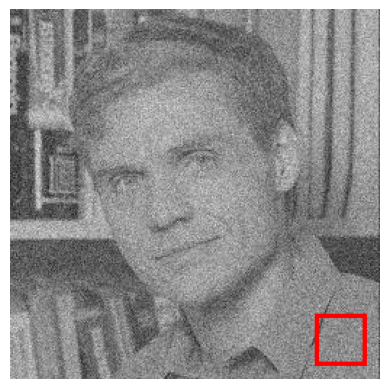

Do you want to apply this crop? (yes/no):  no


Re-enter crop boundaries.
Enter crop boundaries:


Leftmost Pixel:  215
Uppermost Pixel:  220
Rightmost Pixel:  245
Lowermost Pixel:  250


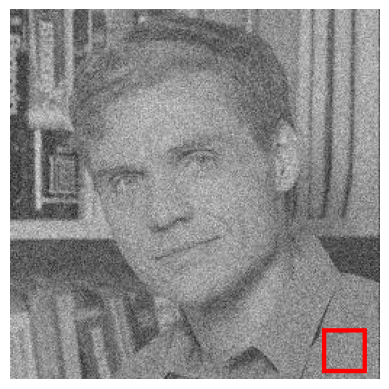

Do you want to apply this crop? (yes/no):  yes


Cropped Image Dimensions: (30, 30)


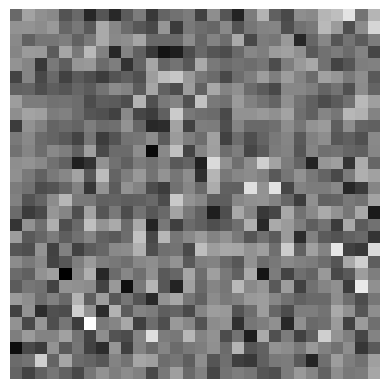

In [299]:
def plot_image_with_border(image, crop_box):
    """Display the image with a border indicating the crop region."""
    overlay_image = image.convert("RGB")  # Ensure the image is in RGB mode
    draw = ImageDraw.Draw(overlay_image)
    #draw border (red, width=3)
    draw.rectangle(crop_box, outline="red", width=3)   
    #display
    plt.imshow(overlay_image) 
    plt.axis("off")
    plt.show()

print(f"Original Image Dimensions: {demo_image.size}")  #(width, height)

#loop to confirm crop
while True:
    #user input: crop coords
    print("Enter crop boundaries:")
    left = int(input("Leftmost Pixel: "))
    upper = int(input("Uppermost Pixel: "))
    right = int(input("Rightmost Pixel: "))
    lower = int(input("Lowermost Pixel: "))

    #validate coords
    if left < 0 or upper < 0 or right > demo_image.width or lower > demo_image.height:
        print("Invalid crop boundaries. Please enter values within the image dimensions.")
        continue

    #Show the proposed crop region with a border
    crop_box = (left, upper, right, lower)
    plot_image_with_border(demo_image, crop_box)

    #confirm crop choice
    confirm = input("Do you want to apply this crop? (yes/no): ").strip().lower()
    if confirm == "yes":
        #apply crop
        cropped_image = demo_image.crop(crop_box)
        print(f"Cropped Image Dimensions: {cropped_image.size}")
        #display cropped img
        plt.imshow(cropped_image, cmap="gray")
        plt.axis("off")
        plt.show()
        break
    else:
        print("Re-enter crop boundaries.")


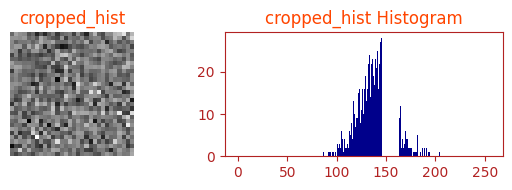

In [311]:
display_pair(cropped_image, title='cropped_hist', m=6, n=2, save=True)

## Examine Subsample Statistics

In [59]:
compute_first_order_statistics_extended(np.array(cropped_image.histogram()), display=True)

Number of pixels: 6400
Minimum value: 0
Maximum value: 127
Mean value: 62.12171875
Standard deviation: 17.048158721571617
Median value: 62.0
Mode value: 61
Skewness: -0.019507553510732096
Kurtosis: 0.11146448531216624
Energy: 688762
Entropy: -41729.80357798899


(6400, 0, 127, 62.122, 17.048, 62.000, 61, -0.020, 0.111, 688762, -41729.804)

## Generate Distributions Using Obtained Statistics

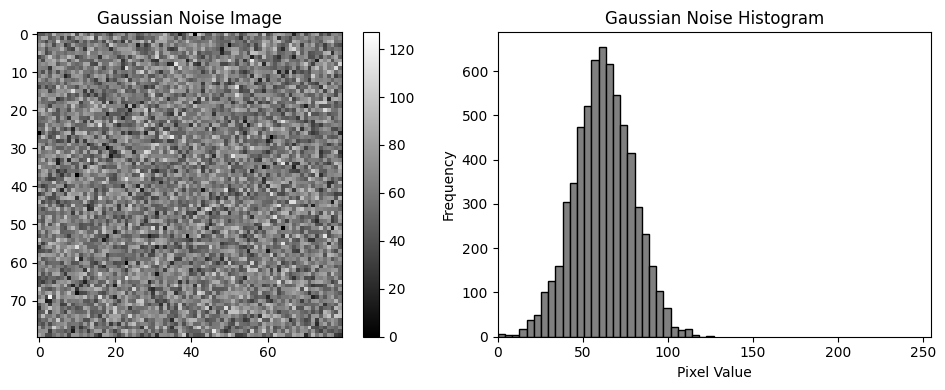

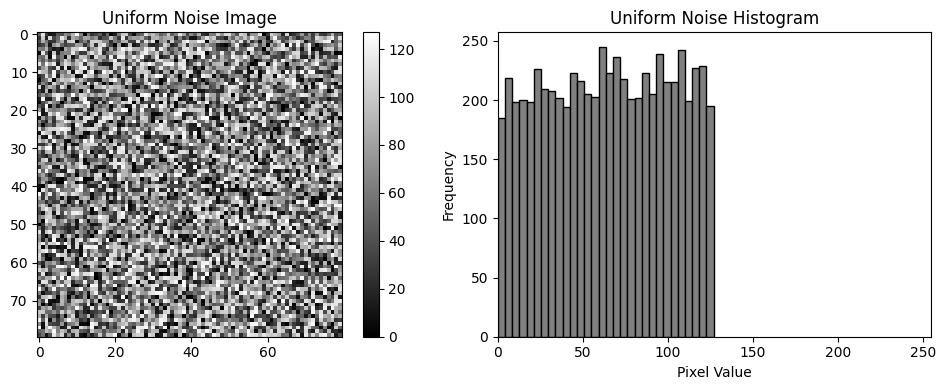

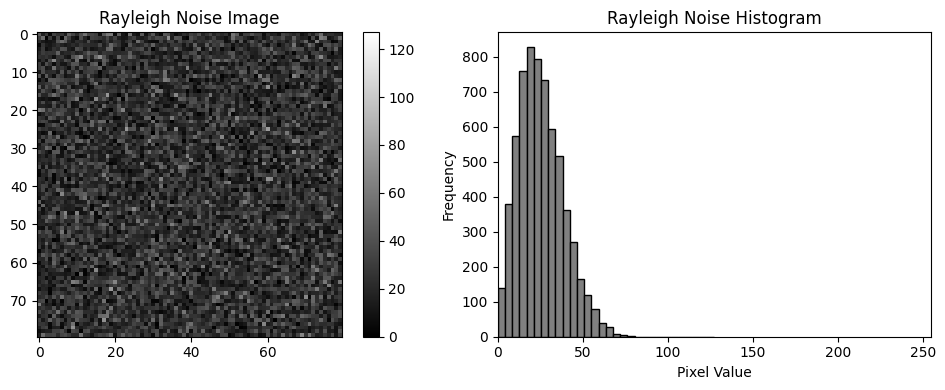

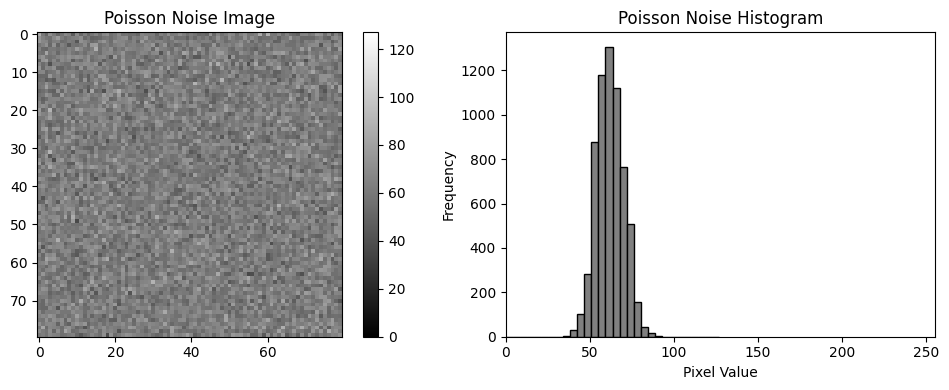

In [97]:
#observed noise distribution statistics
num_pixels = 6400
min_value = 0
max_value = 127
mean_value = 62.12171875
std_dev = 17.048158721571617

#gaussian noise
gaussian_noise = np.random.normal(loc=mean_value, scale=std_dev, size=num_pixels)
gaussian_noise = np.clip(gaussian_noise, min_value, max_value)
generated_gauss_image = numpy_to_pil(gaussian_noise.reshape((80, 80)))

#uniform noise
uniform_noise = np.random.uniform(low=min_value, high=max_value, size=num_pixels)
generated_uniform_image = numpy_to_pil(uniform_noise.reshape((80,80)))

#rayleigh noise
rayleigh_scale = std_dev / np.sqrt(2 * (1 - (2 / np.pi)))
rayleigh_noise = np.random.rayleigh(scale=rayleigh_scale, size=num_pixels)
rayleigh_noise = np.clip(rayleigh_noise, min_value, max_value)
generated_rayleigh_image = numpy_to_pil(rayleigh_noise.reshape((80,80)))

#poisson noise
poisson_lambda = mean_value
poisson_noise = np.random.poisson(lam=poisson_lambda, size=num_pixels)
poisson_noise = np.clip(poisson_noise, min_value, max_value)
generated_poisson_image = numpy_to_pil(poisson_noise.reshape((80,80)))

#DISP GAUSSIAN
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(generated_gauss_image, cmap='gray', vmin=min_value, vmax=max_value)
plt.title('Gaussian Noise Image')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.hist(gaussian_noise, bins=30, range=(min_value, max_value), color='gray', edgecolor='black')
plt.title('Gaussian Noise Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.xlim([0,255])
plt.tight_layout()
plt.show()

#DISP UNIFORM
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(generated_uniform_image, cmap='gray', vmin=min_value, vmax=max_value)
plt.title('Uniform Noise Image')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.hist(uniform_noise, bins=30, range=(min_value, max_value), color='gray', edgecolor='black')
plt.title('Uniform Noise Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.xlim([0,255])
plt.tight_layout()
plt.show()

#DISP RAYLEIGH
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(generated_rayleigh_image, cmap='gray', vmin=min_value, vmax=max_value)
plt.title('Rayleigh Noise Image')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.hist(rayleigh_noise, bins=30, range=(min_value, max_value), color='gray', edgecolor='black')
plt.title('Rayleigh Noise Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.xlim([0,255])
plt.tight_layout()
plt.show()

#DISP POISSON
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(generated_poisson_image, cmap='gray', vmin=min_value, vmax=max_value)
plt.title('Poisson Noise Image')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.hist(poisson_noise, bins=30, range=(min_value, max_value), color='gray', edgecolor='black')
plt.title('Poisson Noise Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.xlim([0,255])
plt.tight_layout()
plt.show()


## Observational Evaluation & Quantatative Data Distance Comparison

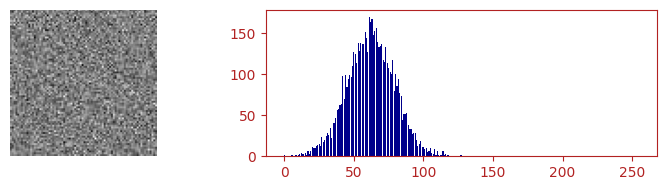

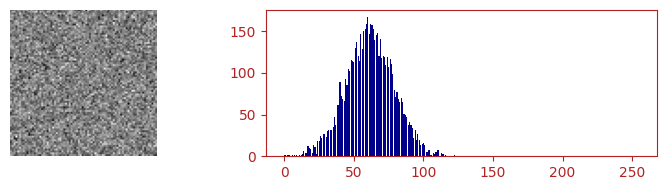

Euclidean Difference of CDF Values between Original and Generated GAUSSIAN Noise: 111.61541112229978
----------------------------------------------------------------------------------------------------




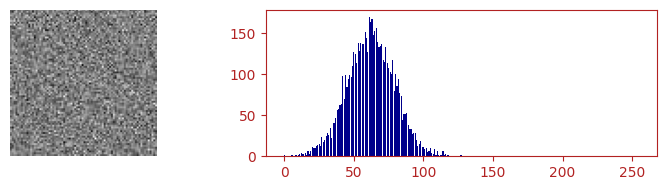

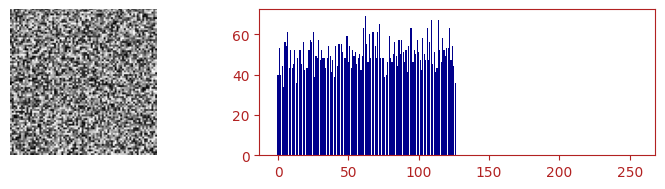

Euclidean Difference of CDF Values between Original and Generated UNIFORM Noise: 600.3415694419302
----------------------------------------------------------------------------------------------------




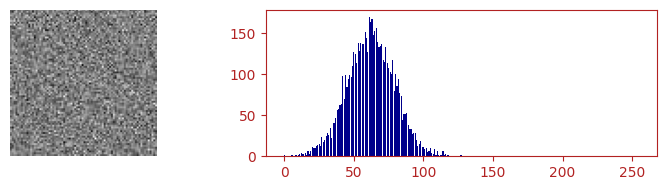

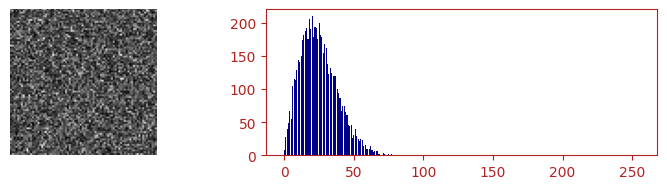

Euclidean Difference of CDF Values between Original and Generated RAYLEIGH Noise: 1121.5863765221116
----------------------------------------------------------------------------------------------------




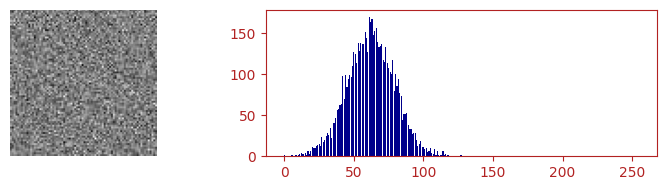

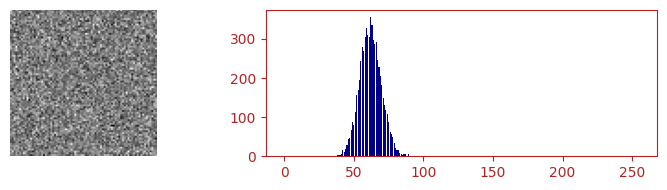

Euclidean Difference of CDF Values between Original and Generated POISSON Noise: 650.5443874171847
----------------------------------------------------------------------------------------------------




In [109]:
## Compare Original Sample and Generated Gaussian
display_pair(cropped_image)
display_pair(generated_gauss_image)
gauss_dist = calculate_data_distance(cropped_image, numpy_to_pil(generated_gauss_image))
print(f"Euclidean Difference of CDF Values between Original and Generated GAUSSIAN Noise: {gauss_dist}")
print('----------------------------------------------------------------------------------------------------\n\n')



display_pair(cropped_image)
display_pair(generated_uniform_image)
uniform_dist = calculate_data_distance(cropped_image, numpy_to_pil(generated_uniform_image))
print(f"Euclidean Difference of CDF Values between Original and Generated UNIFORM Noise: {uniform_dist}")
print('----------------------------------------------------------------------------------------------------\n\n')



display_pair(cropped_image)
display_pair(generated_rayleigh_image)
rayleigh_dist = calculate_data_distance(cropped_image, numpy_to_pil(generated_rayleigh_image))
print(f"Euclidean Difference of CDF Values between Original and Generated RAYLEIGH Noise: {rayleigh_dist}")
print('----------------------------------------------------------------------------------------------------\n\n')



display_pair(cropped_image)
display_pair(generated_poisson_image)
poisson_dist = calculate_data_distance(cropped_image, numpy_to_pil(generated_poisson_image))
print(f"Euclidean Difference of CDF Values between Original and Generated POISSON Noise: {poisson_dist}")
print('----------------------------------------------------------------------------------------------------\n\n')


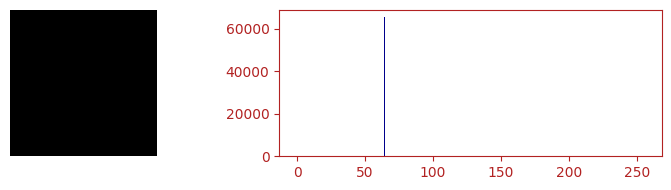

In [112]:
img = addNoise_uniform()
display_pair(img)